### ***We need to build a model, which can classify between healthy and diseased crop leaves and also if the crop have any disease, predict which disease is it.***

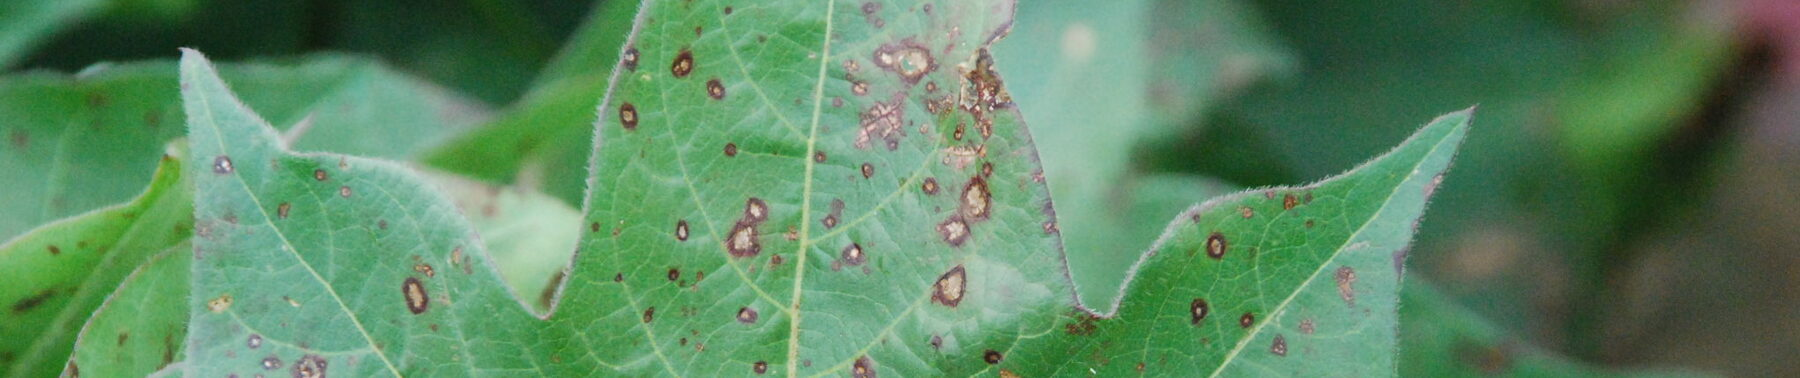

# DataSet Information
***We have 38 classes of plant disease images which contains 70295 images in training set and 17572 in valid set***

***Each class contains average of 1700-1800 number of images to work upon***

***Each image is of size= (256,256,3)***

## Import Used Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import os
import tensorflow
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras.models import Sequential,load_model,Model
from keras.layers import Conv2D,MaxPool2D,AveragePooling2D,Dense,Flatten,ZeroPadding2D,BatchNormalization,Activation,Add,Input,Dropout,GlobalAveragePooling2D
from keras.initializers import glorot_uniform
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
import warnings
warnings.filterwarnings(action='ignore')

## Loading Images File

In [2]:
data_dir = "../input/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)"
train_dir = data_dir + "/train"
valid_dir = data_dir + "/valid"

In [3]:
diseases = os.listdir(train_dir)
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

,no. of images
Tomato___Late_blight,1851
Tomato___healthy,1926
Grape___healthy,1692
Orange___Haunglongbing_(Citrus_greening),2010
Soybean___healthy,2022
Squash___Powdery_mildew,1736
Potato___healthy,1824
Corn_(maize)___Northern_Leaf_Blight,1908
Tomato___Early_blight,1920
Tomato___Septoria_leaf_spot,1745


Text(0.5, 1.0, 'Images per each class of plant disease')

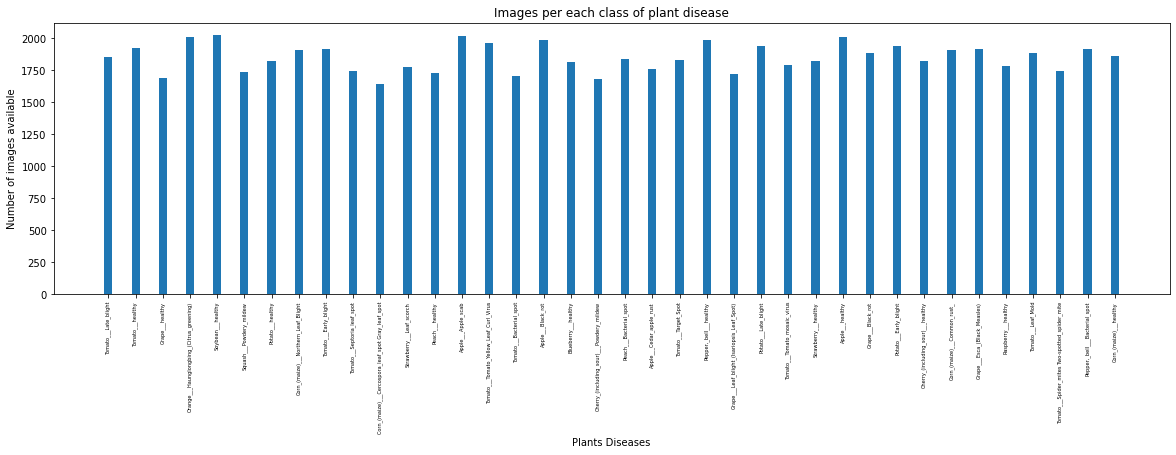

In [4]:
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants Diseases', fontsize=10)
plt.ylabel('Number of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

## Preparing Images For Training By Image Preprocessing

In [5]:
train_datagen= ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1/255.0,
    fill_mode='nearest',
    validation_split=0.1)
val_datagen= ImageDataGenerator(
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    rescale=1/255.0,
    validation_split=0.1)
train= train_datagen.flow_from_directory(train_dir,batch_size=128,target_size=(210,210),color_mode='rgb',class_mode='categorical',seed=42)
valid=val_datagen.flow_from_directory(valid_dir,batch_size=128,target_size=(210,210),color_mode='rgb',class_mode='categorical')

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


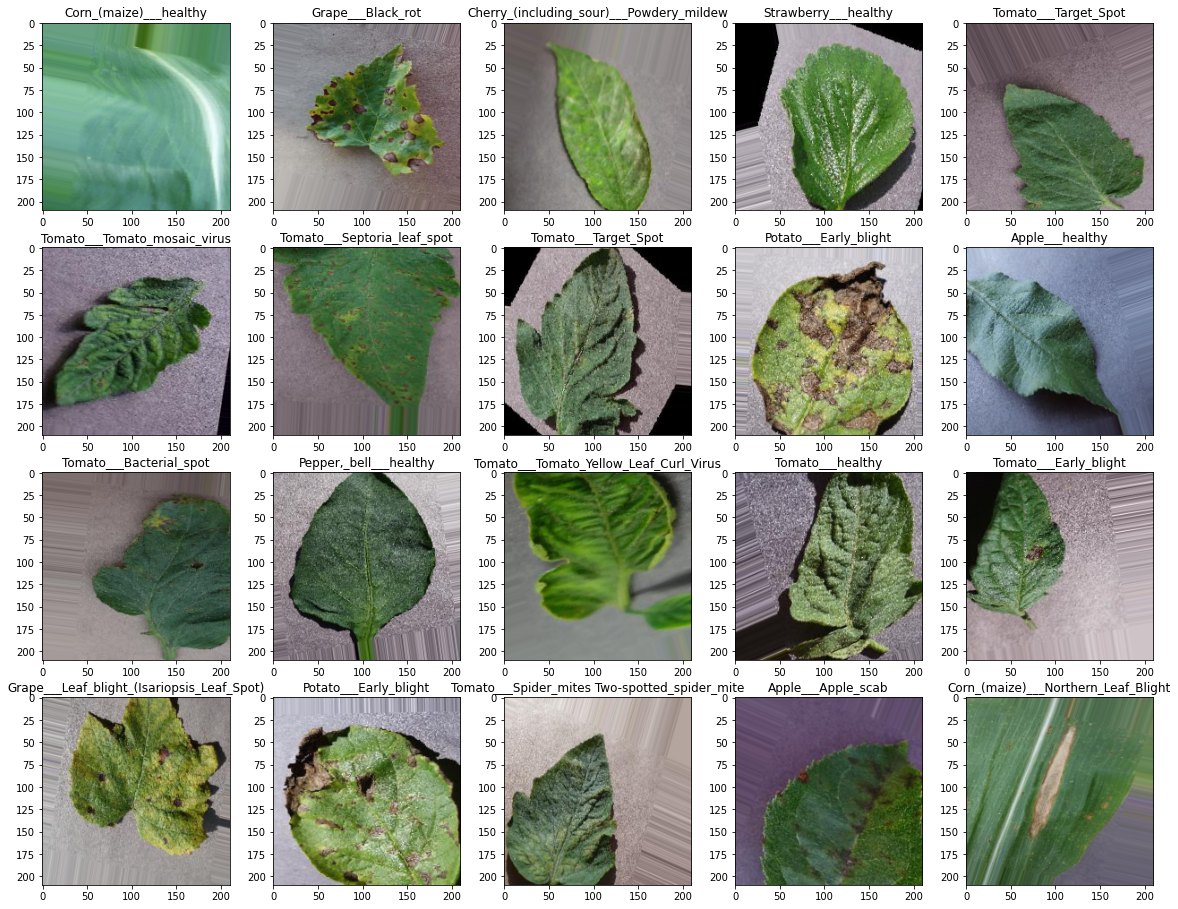

In [6]:
classes=list(train.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train:
    for i in range(0,20):
        plt.subplot(5,5,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    plt.show()
    break

## *Model 1*

In [7]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(128,(3,3),activation="relu",padding="same",input_shape=(210,210,3)))
model.add(BatchNormalization())
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(64,(4,4),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64,(4,4),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(128,(4,4),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128,(4,4),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(256,(4,4),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(256,(4,4),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(keras.layers.MaxPooling2D(3,3))

model.add(keras.layers.Conv2D(64,(4,4),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(64,(4,4),activation="relu",padding="same"))
model.add(BatchNormalization())

model.add(keras.layers.Conv2D(128,(4,4),activation="relu",padding="same"))
model.add(keras.layers.Conv2D(128,(4,4),activation="relu",padding="same"))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(256,activation="relu"))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(38,activation="softmax"))

model.summary()

2022-11-15 22:18:06.893091: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 210, 210, 128)     3584      
_________________________________________________________________
batch_normalization (BatchNo (None, 210, 210, 128)     512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 70, 70, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 70, 70, 64)        131136    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 70, 70, 64)        65600     
_________________________________________________________________
batch_normalization_1 (Batch (None, 70, 70, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0

In [8]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=['accuracy'])
history = model.fit_generator(train,validation_data=valid,epochs = 4)

2022-11-15 22:18:09.285308: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/4
550/550 [==============================] - 8922s 16s/step - loss: 1.5482 - accuracy: 0.5364 - val_loss: 4.3390 - val_accuracy: 0.2630
Epoch 2/4
550/550 [==============================] - 8519s 15s/step - loss: 0.5420 - accuracy: 0.8310 - val_loss: 1.1543 - val_accuracy: 0.6939
Epoch 3/4
550/550 [==============================] - 8577s 16s/step - loss: 0.3423 - accuracy: 0.8915 - val_loss: 1.2549 - val_accuracy: 0.6818
Epoch 4/4
550/550 [==============================] - 8593s 16s/step - loss: 0.2486 - accuracy: 0.9218 - val_loss: 2.7037 - val_accuracy: 0.5051


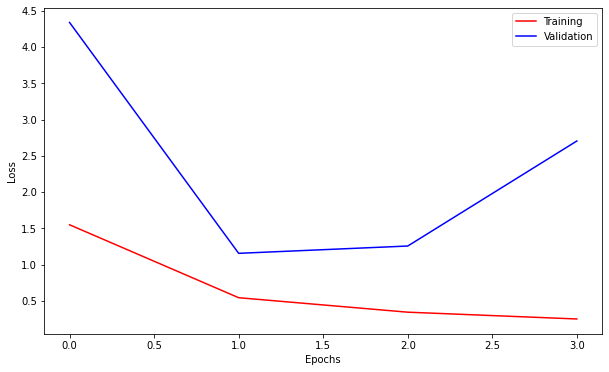

In [9]:
loss =history.history['loss']
val_loss =history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,val_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

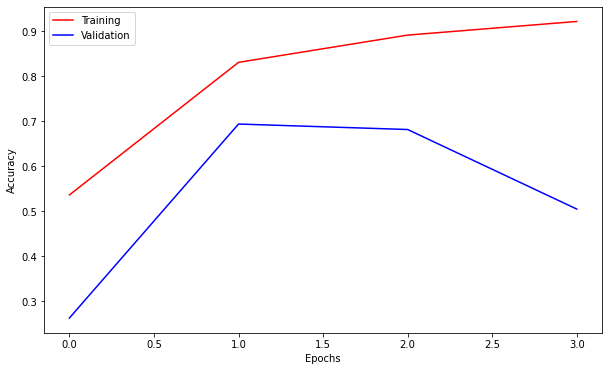

In [10]:
acc =history.history['accuracy']
val_acc =history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(10,6))
plt.plot(epochs,acc,c="red",label="Training")
plt.plot(epochs,val_acc,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [11]:
model.save("model_main.h5")